In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import math
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [173]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [174]:
df.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson', '?']
df.drop(labels=[0,1,2,3,352,353,354],axis=0,inplace=True)
df.drop(labels=['city','rape_revised', '?'],axis=1,inplace=True)

columns = list(df.columns)
for column in columns:
    df[column] = df[column].str.replace(',', '')

df = df.apply(pd.to_numeric)
df = df.dropna()

#Target:'violent_crime'
#Features:'aggravated_assault', 'arson', 'burglary', 'larceny_theft', 'murder', 'population', 'rape_legacy', 'vehicle_theft'

In [175]:
df.head()

,population,violent_crime,murder,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson
4,1861,0,0,0,0,0,12,2,10,0,0.0
5,2577,3,0,0,0,3,24,3,20,1,0.0
6,2846,3,0,0,0,3,16,1,15,0,0.0
10,1781,3,0,0,0,3,10,0,10,0,0.0
11,118296,107,1,7,31,68,2118,204,1882,32,3.0


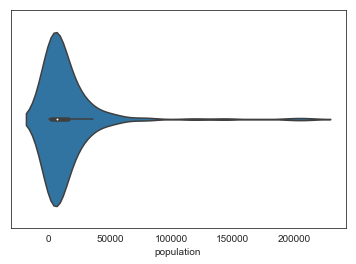

In [176]:
population = sns.violinplot(df['population'])

In [177]:
q25 = df['population'].quantile(0.25)
q75 = df['population'].quantile(0.75)
iqr = q75 - q25
maximum = q75 + (iqr * 1.5)
df = df.where(df['population'] < maximum)

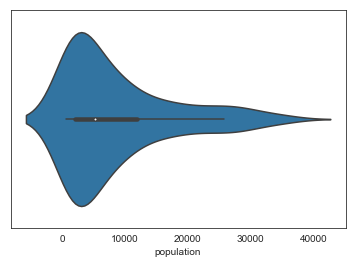

In [178]:
population = sns.violinplot(df['population'])

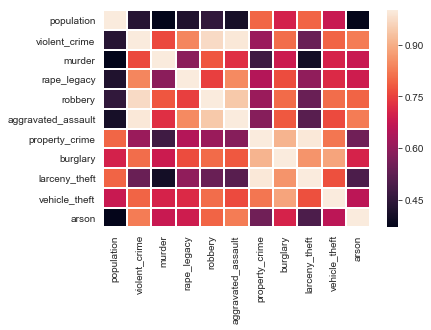

In [179]:
correlations = sns.heatmap(df.corr(), linewidths=1)

In [180]:
df['population'] = df['population'].apply(lambda x: x/1000)
features = df[['violent_crime','murder','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson']]
feature_columns = list(features.columns)
for column in feature_columns:
    df[column] = df[column].apply(lambda x: x/df['population'])
df = df.dropna()

In [181]:
df.head()

,population,violent_crime,murder,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson
4,1.861,0.000000,0.0,0.000000,0.000000,0.000000,6.448146,1.074691,5.373455,0.000000,0.000000
5,2.577,1.612037,0.0,0.000000,0.000000,1.612037,12.896292,1.612037,10.746910,0.537346,0.000000
6,2.846,1.612037,0.0,0.000000,0.000000,1.612037,8.597528,0.537346,8.060183,0.000000,0.000000
10,1.781,1.612037,0.0,0.000000,0.000000,1.612037,5.373455,0.000000,5.373455,0.000000,0.000000
12,9.519,4.836110,0.0,1.074691,2.149382,1.612037,112.842558,8.597528,101.020956,3.224073,0.537346


In [182]:
df.describe()

,population,violent_crime,murder,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,8.736372,6.548117,0.059358,0.477988,1.899454,4.111318,83.266686,12.758832,68.355348,2.152506,0.274921
std,8.848373,19.518755,0.293170,1.260456,6.804242,11.697474,119.061364,20.687394,97.235937,4.316598,0.789324
min,0.526000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.053750,0.403009,0.000000,0.000000,0.000000,0.000000,9.537883,1.612037,7.388501,0.000000,0.000000
50%,5.261500,1.612037,0.000000,0.000000,0.000000,1.074691,31.972058,4.567437,25.523912,0.537346,0.000000
75%,11.840750,6.716819,0.000000,0.537346,1.612037,4.298764,103.976357,15.314347,85.303600,2.149382,0.000000
max,36.369000,233.745298,2.686728,11.284256,80.601827,139.172488,727.028479,163.353036,635.142397,33.852767,8.060183


### New Features

In [183]:
df['violent_crime2'] = df['violent_crime'].apply(lambda x: 1 if x> df['violent_crime'].quantile(0.50) else 0)

In [184]:
df['arson_squared'] = df['arson'] **2

In [186]:
df['murder_squared']=df['murder']**2

In [188]:
df['rape_squared']=df['rape_legacy']**2

In [190]:
df['total_theft'] = df['burglary']+df['larceny_theft']+df['vehicle_theft']

In [192]:
df['total_violence'] = df['aggravated_assault']+df['arson']+df['rape_legacy']+df['robbery']

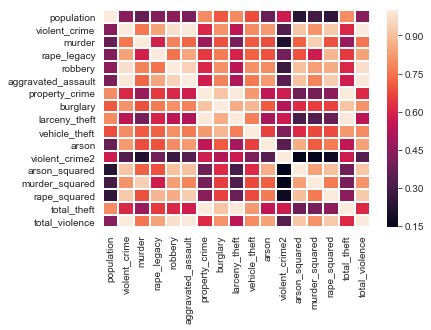

In [194]:
correlations = sns.heatmap(df.corr(),linewidths=1)

### Logistic Regression

In [201]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(how="all")
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime2']
blr = LogisticRegression(C=1e9)
fit = blr.fit(X, Y)
scores_blr = cross_val_score(blr, X, Y, cv=5)
score_blr = cross_val_score(blr, X, Y, cv=5).mean()
print('Coefficients: \n', blr.coef_)
print('Cross-Validation Scores: \n',scores_blr)
print('Average of Cross-Validation Scores: {:.2%}.\n'.format(score_blr))

Coefficients: 
 [[ 3.49804239 -1.31452235 -0.49062631  0.13134222 -0.22637909  0.03980248
   0.02141898  0.05888395  4.82508064  2.90056717  3.43577524  0.15142227
  10.44437592  0.24645914]]
Cross-Validation Scores: 
 [1.         0.94285714 0.97058824 1.         0.97058824]
Average of Cross-Validation Scores: 97.68%.



### Ridge Logistic Regression

In [196]:
#alpha = 5
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime']
r_reg = linear_model.Ridge(alpha=5, fit_intercept=False) 
fit = r_reg.fit(X, Y)
scores_r_reg = cross_val_score(r_reg, X, Y, cv=5)
score_r_reg = cross_val_score(r_reg, X, Y, cv=5).mean()
print('Lambda:', 5)
print('Coefficients: \n', r_reg.coef_)
print('Cross-Validation Scores: \n', scores_r_reg)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_r_reg))

Lambda: 5
Coefficients: 
 [ 0.36012602 -0.38988362 -0.07170804  0.00225196  0.00102801  0.25940386
  0.26076762  0.00177404  0.27471293  0.02189756  0.38936285 -0.00139015
  0.63431818 -0.00467011]
Cross-Validation Scores: 
 [0.99989728 0.99956032 0.99977116 0.99978433 0.9992357 ]
Averaged Cross-Validation Scores: 99.96%.



In [197]:
#alpha = 10
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime']
r_reg = linear_model.Ridge(alpha=10, fit_intercept=False) 
fit = r_reg.fit(X, Y)
scores_r_reg = cross_val_score(r_reg, X, Y, cv=5)
score_r_reg = cross_val_score(r_reg, X, Y, cv=5).mean()
print('Lambda:', 10)
print('Coefficients: \n', r_reg.coef_)
print('Cross-Validation Scores: \n', scores_r_reg)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_r_reg))

Lambda: 10
Coefficients: 
 [ 3.51794147e-01 -3.09184390e-01 -9.03657163e-02  3.67527479e-03
  6.33803609e-04  1.79928755e-01  2.25999824e-01  2.40261702e-03
  2.08751290e-01  3.28651311e-02  3.88736663e-01 -1.22249078e-03
  6.40097711e-01 -5.53156920e-03]
Cross-Validation Scores: 
 [0.99978182 0.99911522 0.99957955 0.99965716 0.99881199]
Averaged Cross-Validation Scores: 99.94%.



### Lasso Regression

In [198]:
#alpha = 5
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime']
l_reg = linear_model.Lasso(alpha=5, fit_intercept=False) 
fit = l_reg.fit(X, Y)
scores_l_reg = cross_val_score(l_reg, X, Y, cv=5)
score_l_reg = cross_val_score(l_reg, X, Y, cv=5).mean()
print('Lambda:', 5)
print('Coefficients: \n', l_reg.coef_)
print('Cross-Validation Scores: \n', scores_l_reg)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_l_reg))

Lambda: 5
Coefficients: 
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.58366727e-04
  9.61239713e-01  0.00000000e+00]
Cross-Validation Scores: 
 [0.99770783 0.98298267 0.99926559 0.98055899 0.99612946]
Averaged Cross-Validation Scores: 99.13%.



In [199]:
#alpha = 10
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime']
l_reg = linear_model.Lasso(alpha=10, fit_intercept=False) 
fit = l_reg.fit(X, Y)
scores_l_reg = cross_val_score(l_reg, X, Y, cv=5)
score_l_reg = cross_val_score(l_reg, X, Y, cv=5).mean()
print('Lambda:', 10)
print('Coefficients: \n', l_reg.coef_)
print('Cross-Validation Scores: \n', scores_l_reg)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_l_reg))

Lambda: 10
Coefficients: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00246186
 0.94306262 0.        ]
Cross-Validation Scores: 
 [0.99716318 0.98059929 0.99896601 0.92047456 0.99634079]
Averaged Cross-Validation Scores: 97.87%.



In [200]:
#alpha = 20
X = df[['aggravated_assault','arson','arson_squared','burglary','larceny_theft','murder','murder_squared','population','rape_legacy','rape_squared','robbery','total_theft','total_violence','vehicle_theft']]
Y = df['violent_crime']
l_reg = linear_model.Lasso(alpha=20, fit_intercept=False) 
fit = l_reg.fit(X, Y)
scores_l_reg = cross_val_score(l_reg, X, Y, cv=5)
score_l_reg = cross_val_score(l_reg, X, Y, cv=5).mean()
print('Lambda:', 20)
print('Coefficients: \n', l_reg.coef_)
print('Cross-Validation Scores: \n', scores_l_reg)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_l_reg))

Lambda: 20
Coefficients: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00545679
 0.90676335 0.        ]
Cross-Validation Scores: 
 [0.99537249 0.97290665 0.99793943 0.67745328 0.99619395]
Averaged Cross-Validation Scores: 92.80%.



### Summary

### Overall, it seems that I get the best results from the Lasso Regression model. I got a high and similar R-squared value from the Logistic and Ridge regression models which tells me that it was most likely due to overfitting. I tried a Lasso regression model with alpha = 5 and alpha  = 10. I would trust the second model with alpha = 10 becuase it has a better R-qaured value and I prefer Lasso regression due it dropping features to prevent overfitting.